In [165]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [166]:
xlim = (-10, 10)
ylim = (-10, 10)
step = 0.02

np.random.seed(1)
N = 50

c1 = np.random.randn(N,2) + np.array([-1, 0])
c2 = np.random.randn(N,2) + np.array([ 3, 5])

X = np.vstack((c1,c2))
y = np.vstack((-1*np.ones((N,1)), np.ones((N,1))))

#####
# A acurácia é a proporção de acertos sobre o total de exemplos

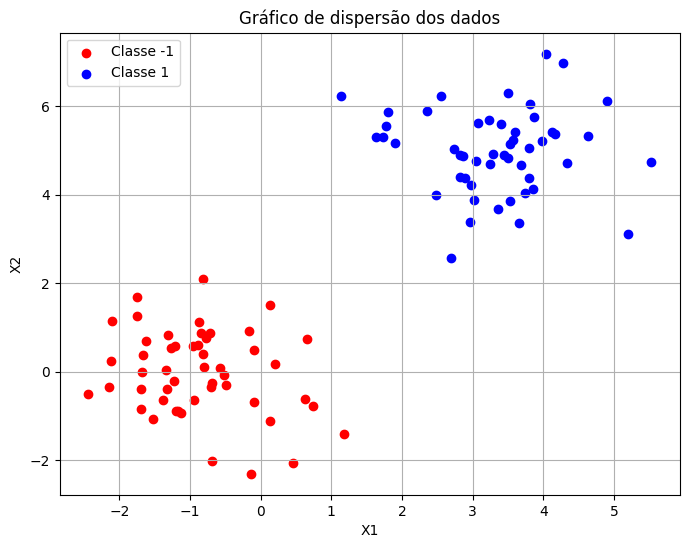

In [167]:
# Plotando os dados
plt.figure(figsize=(8, 6))

plt.scatter(X[y.ravel() == -1, 0], X[y.ravel() == -1, 1], color='red', label='Classe -1')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='blue', label='Classe 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfico de dispersão dos dados')
plt.legend()

plt.grid(True)
plt.show()

In [168]:
## Função de ativação:
def sgn(x):
    return (1 if x >= 0 else -1)

## Predição:
def predict(w, x):
    return sgn(np.dot(w.T, x))

In [169]:
def train(X, y, epochs=5000, eta=0.01, bias=1):
    # Adiciona uma coluna de 1s ao conjunto de dados de entrada para representar o viés
    X_b = np.c_[X, np.full((X.shape[0], 1), bias)] # adiciona uma coluna com valor do bias para fazer [x1, x2, bias]
    # Inicializa os pesos, incluindo o peso do viés
    w = np.zeros((X_b.shape[1], 1))
    print(w)
    
    for epoch in range(epochs):
        for i in range(X_b.shape[0]): # para cada amostra
            x = X_b[i].reshape(-1, 1) # vetor de entrada
            y_hat = predict(w, x) # y chapéu (previsão)
            w += eta * (y[i] - y_hat) * x # atualização do peso
    
    return w

In [170]:
def plot_decision_boundary(X, y, w):
    # Encontrando os limites do gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Criando uma grade de pontos para plotagem
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Adicionando uma coluna de uns para representar o termo de viés (bias)
    ones = np.ones(xx.ravel().shape[0])
    points = np.c_[xx.ravel(), yy.ravel(), ones]

    # Calculando a fronteira de decisão
    Z = np.dot(points, w)
    Z = np.where(Z >= 0, 1, -1)
    Z = Z.reshape(xx.shape)

    # Plotando a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.4)


In [171]:
w = train(X, y, eta=0.01, epochs=5000, bias=1)

[[0.]
 [0.]
 [0.]]


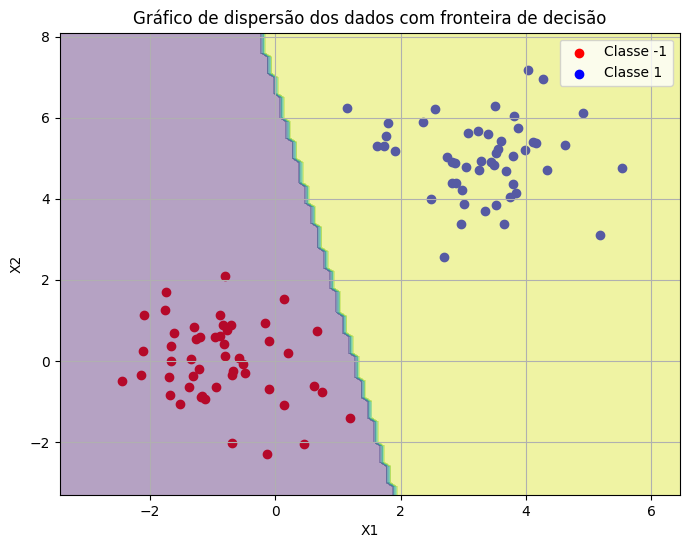

[[ 0.06259728]
 [ 0.01172784]
 [-0.08      ]]


In [172]:

# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == -1, 0], X[y.ravel() == -1, 1], color='red', label='Classe -1')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='blue', label='Classe 1')

# Plotando a fronteira de decisão
plot_decision_boundary(X, y, w)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfico de dispersão dos dados com fronteira de decisão')
plt.legend()
plt.grid(True)
plt.show()
print(w)

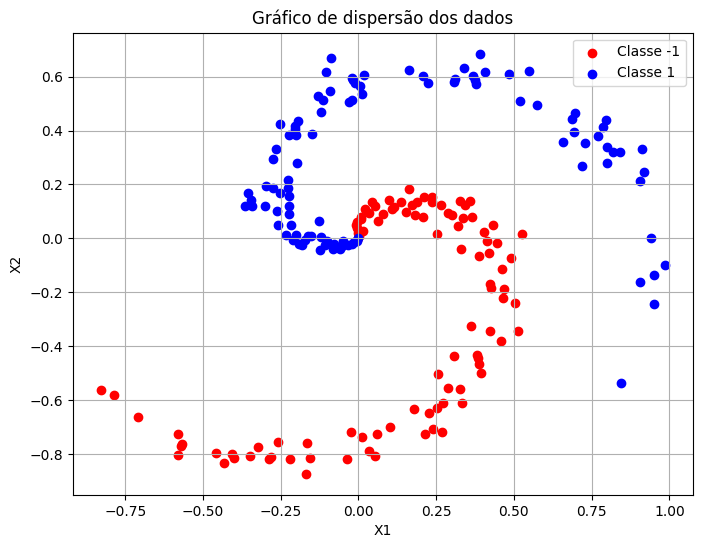

In [173]:
def generate_spiral_data(n_samples, n_classes=2):
    X = np.zeros((n_samples * n_classes, 2))
    y = np.zeros(n_samples * n_classes, dtype='int')

    for class_index in range(n_classes):
        ix = range(n_samples * class_index, n_samples * (class_index + 1))
        r = np.linspace(0.0, 1, n_samples)  # raio
        t = np.linspace(class_index * 4, (class_index + 1) * 4, n_samples) + np.random.randn(n_samples) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_index

    return X, y

# Gerar dados em espiral
X, y = generate_spiral_data(n_samples=100, n_classes=2)

# Plotando os dados
plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfico de dispersão dos dados')
plt.legend()

plt.grid(True)
plt.show()

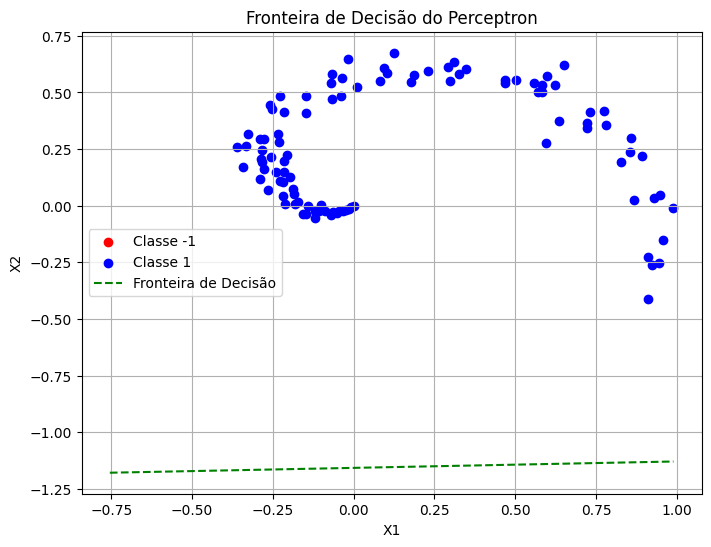

In [174]:
def predict_espiral(weights, x):
    activation = np.dot(weights.T, x)
    return np.where(activation >= 0, 1, -1)

def train_espiral(X, y, epochs=5000, eta=0.01, bias=1):
    # Adiciona uma coluna de 1s ao conjunto de dados de entrada para representar o viés
    X_b = np.c_[X, np.full((X.shape[0], 1), bias)] # adiciona uma coluna com valor do bias para fazer [x1, x2, bias]
    # Inicializa os pesos, incluindo o peso do viés
    w = np.zeros((X_b.shape[1], 1))

    for epoch in range(epochs):
        for i in range(X_b.shape[0]): # para cada amostra
            x = X_b[i].reshape(-1, 1) # vetor de entrada
            y_hat = predict_espiral(w, x) # y chapéu (previsão)
            w += eta * (y[i] - y_hat) * x # atualização do peso
    
    return w

def plot_decision_boundary_espiral(X, y, weights):
    plt.figure(figsize=(8, 6))

    # Scatter plot dos pontos
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Classe -1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

    # Plot da fronteira de decisão
    slope = -weights[0] / weights[1]
    intercept = -weights[2] / weights[1]
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Fronteira de Decisão')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Fronteira de Decisão do Perceptron')
    plt.legend()

    plt.grid(True)
    plt.show()

# Gerar dados em espiral
def generate_spiral_data(n_samples, n_classes=2):
    X = np.zeros((n_samples * n_classes, 2))
    y = np.zeros(n_samples * n_classes, dtype='int')

    for class_index in range(n_classes):
        ix = range(n_samples * class_index, n_samples * (class_index + 1))
        r = np.linspace(0.0, 1, n_samples)  # raio
        t = np.linspace(class_index * 4, (class_index + 1) * 4, n_samples) + np.random.randn(n_samples) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_index

    return X, y

X, y = generate_spiral_data(n_samples=100, n_classes=2)

# Treinar o perceptron
weights = train_espiral(X, y)

# Plotar a fronteira de decisão
plot_decision_boundary_espiral(X, y, weights)
